# Libraries

In [1]:
# General use
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Notebook behavior
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
seed = 19  # Replicability


# Data

In [2]:
# Load data
df = pd.read_parquet("../data/preprocessed/phl_relevant_events.parquet")
matrix = pd.read_parquet("../matrices/matrix.parquet")
scaled_matrix = matrix = pd.read_parquet("../matrices/scaled_matrix.parquet")
df.shape, matrix.shape, scaled_matrix.shape

((118372, 13), (118372, 46), (118372, 46))

# Unsupervised Learning

## Feasibility check

In [3]:
from sklearn.decomposition import PCA

0.597325936475251

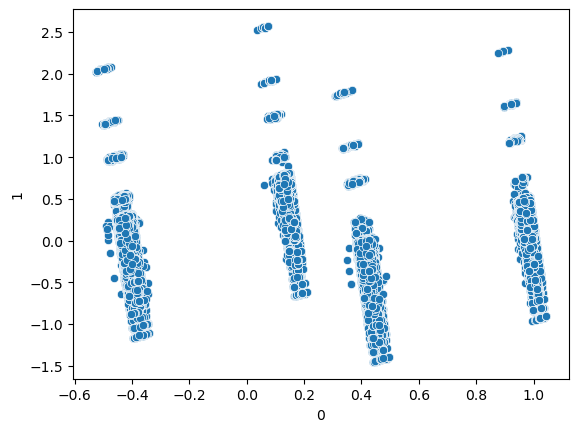

In [4]:
# At n_components=2
pca = PCA(random_state=19, n_components=2)
_ = pca.fit(scaled_matrix)
pca.explained_variance_ratio_.sum()
pca_2 = pd.DataFrame(pca.transform(scaled_matrix))
_ = sns.scatterplot(pca_2, x=0, y=1)

In [5]:
# Check for ave pairwise distances
from sklearn.metrics import pairwise_distances
avg_dists = np.mean(pairwise_distances(scaled_matrix.sample(1000, random_state=19)))
avg_dists

1.1000274905463787

## Parameter Tuning 

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [7]:
# Helper functions
def generate_training_key(min_samples, eps):
    return f"{min_samples=}, {eps=}"

scorers = [davies_bouldin_score, silhouette_score]
def train_dbscan(input_matrix, min_samples, eps, scorers=scorers):
    scores = {scorer.__name__:np.nan for scorer in scorers}

    model = DBSCAN(min_samples=min_samples, eps=eps)
    _ = model.fit(input_matrix)
    labels = pd.Series(model.labels_, index=input_matrix.index.copy())

    # Only score if multiple clusters detected
    if labels.nunique()>1:
        scores = {scorer.__name__:np.round(scorer(np.asarray(scaled_matrix), model.labels_), 8) for scorer in scorers}
    return labels, scores

In [8]:
# Set up dataframe for labels and dict for scores
labels_df = pd.DataFrame(index=matrix.index.copy())
scores_dict = {}

In [9]:
# Define search grid
min_samples_values = [i for i in range(300, 520, 20)]
eps_values = [i/100 for i in range(15, 26, 1)]

len(min_samples_values) * len(eps_values) # Unique combinations

grid_key = f"min_samples_{min(min_samples_values)}_{max(min_samples_values)}_eps_{min(eps_values)}_{max(eps_values)}"

121

In [10]:
%%time
from datetime import datetime as dt
# Train dbscan at different settings
i = 0
for min_samples in min_samples_values:
    for eps in eps_values:
        key = generate_training_key(min_samples, eps)
        print(f"{i}: Started {key} at {dt.now().strftime('%H:%M:%S')}.")

        labels, score = train_dbscan(scaled_matrix, min_samples, eps)
        labels_df[key] = labels
        scores_dict[key] = score

        i += 1

0: Started min_samples=300, eps=0.15 at 07:26:11.
1: Started min_samples=300, eps=0.16 at 07:27:52.
2: Started min_samples=300, eps=0.17 at 07:29:25.
3: Started min_samples=300, eps=0.18 at 07:30:57.
4: Started min_samples=300, eps=0.19 at 07:32:28.
5: Started min_samples=300, eps=0.2 at 07:34:00.
6: Started min_samples=300, eps=0.21 at 07:35:35.
7: Started min_samples=300, eps=0.22 at 07:37:07.
8: Started min_samples=300, eps=0.23 at 07:38:40.
9: Started min_samples=300, eps=0.24 at 07:40:14.
10: Started min_samples=300, eps=0.25 at 07:41:48.
11: Started min_samples=320, eps=0.15 at 07:43:23.
12: Started min_samples=320, eps=0.16 at 07:45:29.
13: Started min_samples=320, eps=0.17 at 07:47:18.
14: Started min_samples=320, eps=0.18 at 07:49:00.
15: Started min_samples=320, eps=0.19 at 07:50:45.
16: Started min_samples=320, eps=0.2 at 07:52:31.
17: Started min_samples=320, eps=0.21 at 07:54:11.
18: Started min_samples=320, eps=0.22 at 07:55:56.
19: Started min_samples=320, eps=0.23 at 07

<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


101: Started min_samples=480, eps=0.17 at 10:40:47.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


102: Started min_samples=480, eps=0.18 at 10:42:31.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


103: Started min_samples=480, eps=0.19 at 10:44:32.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


104: Started min_samples=480, eps=0.2 at 11:03:33.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


105: Started min_samples=480, eps=0.21 at 11:09:28.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


106: Started min_samples=480, eps=0.22 at 11:11:14.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


107: Started min_samples=480, eps=0.23 at 11:12:54.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


108: Started min_samples=480, eps=0.24 at 11:14:35.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


109: Started min_samples=480, eps=0.25 at 11:16:12.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


110: Started min_samples=500, eps=0.15 at 11:17:48.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


111: Started min_samples=500, eps=0.16 at 11:19:34.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


112: Started min_samples=500, eps=0.17 at 11:21:15.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


113: Started min_samples=500, eps=0.18 at 11:22:52.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


114: Started min_samples=500, eps=0.19 at 11:24:25.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


115: Started min_samples=500, eps=0.2 at 11:25:57.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


116: Started min_samples=500, eps=0.21 at 11:27:29.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


117: Started min_samples=500, eps=0.22 at 11:29:01.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


118: Started min_samples=500, eps=0.23 at 11:30:33.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


119: Started min_samples=500, eps=0.24 at 11:32:07.


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


120: Started min_samples=500, eps=0.25 at 11:33:41.
CPU times: user 8h 1min 36s, sys: 1h 31min 43s, total: 9h 33min 20s
Wall time: 4h 9min 5s


<timed exec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [11]:
# Check results
eval_df = pd.DataFrame.from_dict(scores_dict, orient="index")
eval_df["k"] = labels_df.nunique()
eval_df = eval_df.reset_index()

eval_df = eval_df.merge(eval_df["index"].str.extract(r'min_samples=(\d+), eps=(\d+\.\d+)'), left_index=True, right_index=True)

eval_df = eval_df.rename(columns={0:"min_samples", 1:"eps", "index":"key"})
eval_df = eval_df[["key", "min_samples", "eps", "k", "davies_bouldin_score", "silhouette_score"]]
eval_df["min_samples"] = eval_df["min_samples"].astype(int) ; eval_df["eps"] = eval_df["eps"].astype(float)
eval_df = eval_df.dropna()
eval_df.sort_values("davies_bouldin_score").head(10)  # Top 10 settings

# Export
eval_df.to_csv(f"../results/diagnostics/{grid_key}.csv", index=False)

,key,min_samples,eps,k,davies_bouldin_score,silhouette_score
79,"min_samples=440, eps=0.17",440,0.17,13,1.360539,0.056047
57,"min_samples=400, eps=0.17",400,0.17,15,1.365304,0.066442
46,"min_samples=380, eps=0.17",380,0.17,15,1.376463,0.075911
68,"min_samples=420, eps=0.17",420,0.17,14,1.380512,0.061278
101,"min_samples=480, eps=0.17",480,0.17,12,1.386586,0.037889
90,"min_samples=460, eps=0.17",460,0.17,12,1.393847,0.044074
69,"min_samples=420, eps=0.18",420,0.18,15,1.410608,0.116280
91,"min_samples=460, eps=0.18",460,0.18,14,1.413313,0.110252
112,"min_samples=500, eps=0.17",500,0.17,11,1.414972,0.027983
80,"min_samples=440, eps=0.18",440,0.18,14,1.424421,0.114443


In [12]:
# Exclude non-meaningful results-- only -1s
labels_df = labels_df[labels_df.nunique()[labels_df.nunique()>1].index]  

In [15]:
# Rank models
eval_df["pos_silhouette_score"] = eval_df["silhouette_score"] > 0

eval_df["rank"] = (eval_df["davies_bouldin_score"].rank() + eval_df["silhouette_score"].rank()).rank()
eval_df["top_rank_model"] = eval_df["rank"] <= 20
eval_df.sort_values("rank").head(20)

,key,min_samples,eps,k,davies_bouldin_score,silhouette_score,pos_silhouette_score,rank,top_rank_model
99,"min_samples=480, eps=0.15",480,0.15,17,1.451786,-0.252621,False,1.0,True
110,"min_samples=500, eps=0.15",500,0.15,15,1.452419,-0.243052,False,2.0,True
88,"min_samples=460, eps=0.15",460,0.15,17,1.473492,-0.235339,False,3.0,True
44,"min_samples=380, eps=0.15",380,0.15,20,1.470121,-0.191265,False,4.0,True
66,"min_samples=420, eps=0.15",420,0.15,18,1.476159,-0.212382,False,5.0,True
22,"min_samples=340, eps=0.15",340,0.15,22,1.475289,-0.183205,False,6.0,True
55,"min_samples=400, eps=0.15",400,0.15,19,1.479085,-0.206053,False,7.5,True
77,"min_samples=440, eps=0.15",440,0.15,16,1.489192,-0.227638,False,7.5,True
35,"min_samples=360, eps=0.17",360,0.17,17,1.424870,-0.045524,False,9.0,True
101,"min_samples=480, eps=0.17",480,0.17,12,1.386586,0.037889,True,11.0,True


/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4143383342.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4143383342.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4143383342.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4143383342.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4143383342.py:9: Us

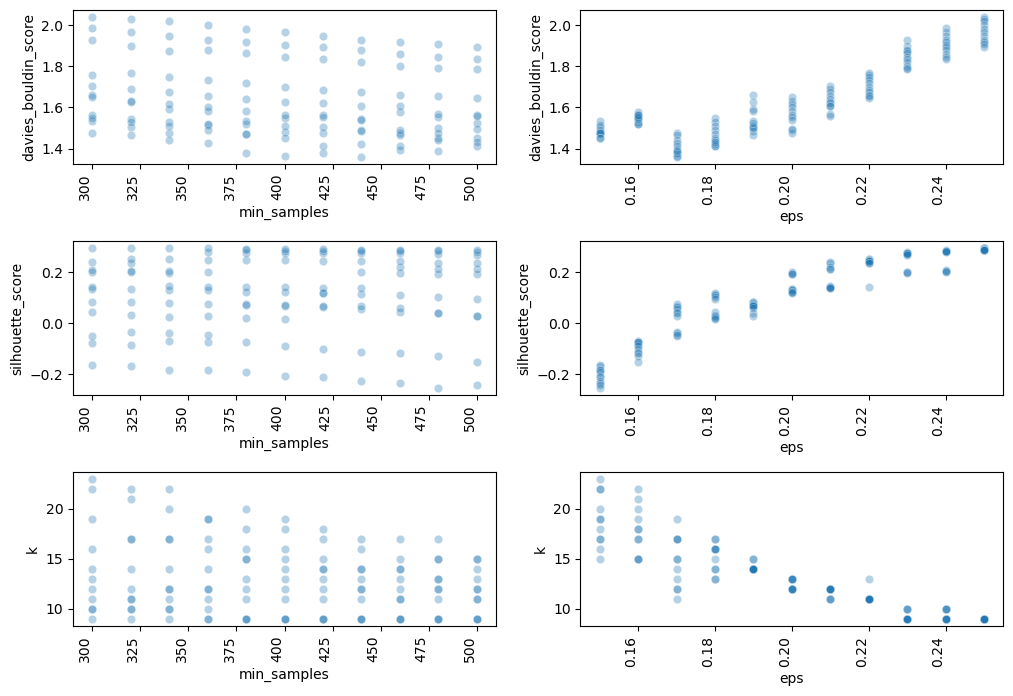

In [16]:
# Relation of settings to scores and k
# Ideal settings, bigger min_samples, smaller eps-- consistent with metric formulation
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
_ = fig.subplots_adjust(hspace=0.5)
for i, param in enumerate(["min_samples", "eps"]):
    for j, metric in enumerate(["davies_bouldin_score", "silhouette_score", "k"]):
        ax = axes[j, i]
        _ = sns.scatterplot(eval_df, y=metric, x=param, alpha=1/3, ax=ax)
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
_ = fig.savefig(f"../results/diagnostics/{grid_key}_scatter.png")


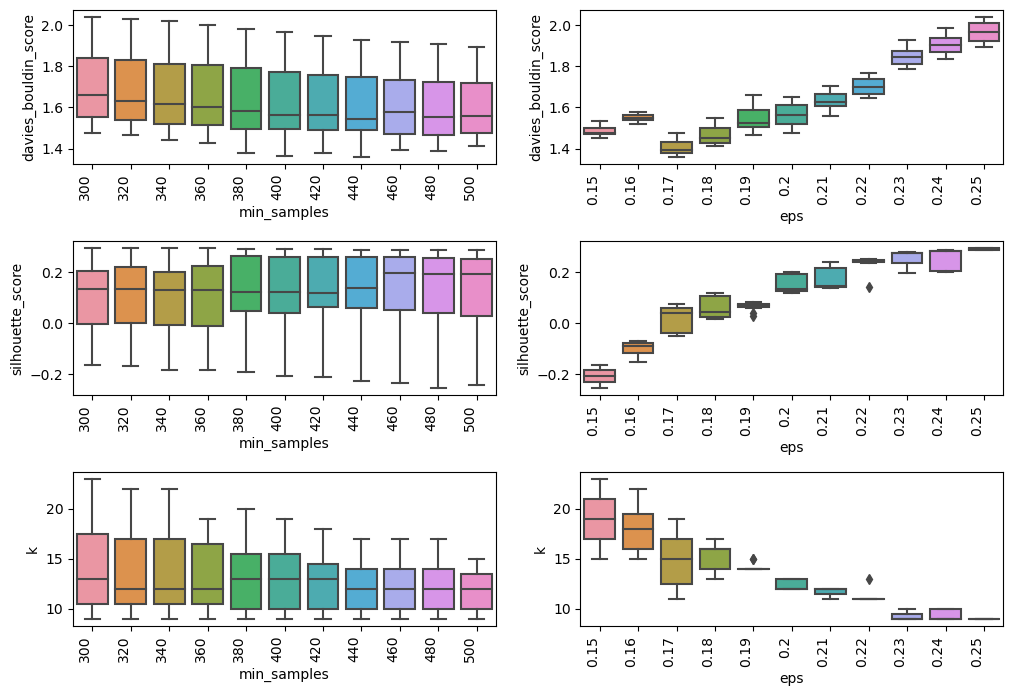

In [17]:
# Relation of settings to scores and k
# Ideal settings, bigger min_samples, smaller eps-- consistent with metric formulation
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
_ = fig.subplots_adjust(hspace=0.5)
for i, param in enumerate(["min_samples", "eps"]):
    for j, metric in enumerate(["davies_bouldin_score", "silhouette_score", "k"]):
        ax = axes[j, i]
        _ = sns.boxplot(data=eval_df, x=param, y=metric, ax=ax)
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
_ = fig.savefig(f"../results/diagnostics/{grid_key}_boxplot.png")


/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4037945320.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4037945320.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4037945320.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4037945320.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/4037945320.py:9: Us

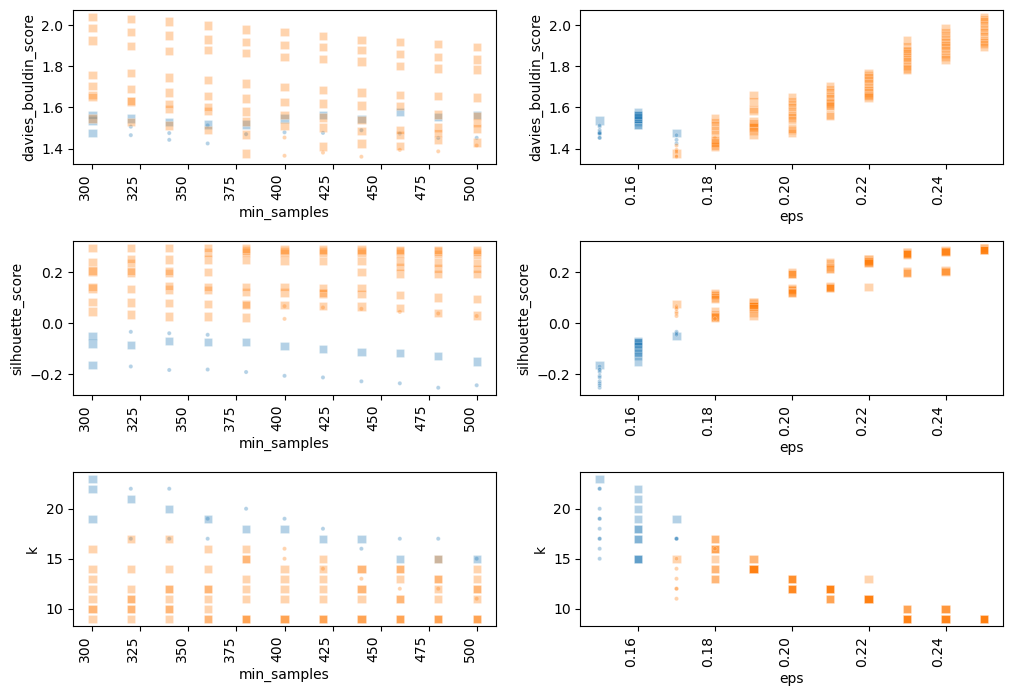

In [21]:
# Relation of settings to scores and k
# Ideal settings, bigger min_samples, smaller eps-- consistent with metric formulation
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
_ = fig.subplots_adjust(hspace=0.5)
for i, param in enumerate(["min_samples", "eps"]):
    for j, metric in enumerate(["davies_bouldin_score", "silhouette_score", "k"]):
        ax = axes[j, i]
        _ = sns.scatterplot(eval_df, y=metric, x=param, hue="pos_silhouette_score", style="top_rank_model", markers={True:".", False:","}, alpha=1/3, ax=ax)
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
        _ = ax.get_legend().remove()
_ = fig.savefig(f"../results/diagnostics/{grid_key}_scatter_marked.png")


In [30]:
# Silhouette score has to be positive
adj_eval_df = eval_df[eval_df["silhouette_score"]>0]

adj_eval_df["adj_rank"] = (adj_eval_df["davies_bouldin_score"].rank() + adj_eval_df["silhouette_score"].rank()).rank()
adj_eval_df["top_adj_rank_model"] = adj_eval_df["rank"] <= 20

adj_eval_df.sort_values("rank").head(20)

/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/41714664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_eval_df["adj_rank"] = (adj_eval_df["davies_bouldin_score"].rank() + adj_eval_df["silhouette_score"].rank()).rank()
/var/folders/4l/jbwb4mc545x6m_zf23gyjhm00000gn/T/ipykernel_79217/41714664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_eval_df["top_adj_rank_model"] = adj_eval_df["rank"] <= 20


,key,min_samples,eps,k,davies_bouldin_score,silhouette_score,pos_silhouette_score,rank,top_rank_model,adj_rank,top_adj_rank_model
101,"min_samples=480, eps=0.17",480,0.17,12,1.386586,0.037889,True,11.0,True,1.5,True
79,"min_samples=440, eps=0.17",440,0.17,13,1.360539,0.056047,True,11.0,True,1.5,True
112,"min_samples=500, eps=0.17",500,0.17,11,1.414972,0.027983,True,13.0,True,3.5,True
90,"min_samples=460, eps=0.17",460,0.17,12,1.393847,0.044074,True,14.0,True,5.0,True
57,"min_samples=400, eps=0.17",400,0.17,15,1.365304,0.066442,True,16.5,True,7.5,True
68,"min_samples=420, eps=0.17",420,0.17,14,1.380512,0.061278,True,16.5,True,7.5,True
58,"min_samples=400, eps=0.18",400,0.18,16,1.453615,0.016764,True,16.5,True,3.5,True
47,"min_samples=380, eps=0.18",380,0.18,16,1.469153,0.021495,True,21.0,False,6.0,False
46,"min_samples=380, eps=0.17",380,0.17,15,1.376463,0.075911,True,23.0,False,10.0,False
92,"min_samples=460, eps=0.19",460,0.19,14,1.467011,0.060188,True,25.0,False,11.5,False


Considerations:
- Interpretability: number of clusters
- Mathematical Consistency: Davies-Bouldin index
- Cluster Quality: Silhoutte scores

Candidates among top 20:
* min_samples=420, eps=0.18	has highest silhouette_score @ 0.116280	
* min_samples=500, eps=0.19	has highest davies_bouldin_score @ 1.525486
* min_samples=480, eps=0.17	and min_samples=440, eps=0.17 has the highest adj rank

In [32]:
# Check candidates
candidates = ["min_samples=480, eps=0.17", "min_samples=440, eps=0.17", "min_samples=420, eps=0.18", "min_samples=500, eps=0.19"]
adj_eval_df.set_index("key").loc[candidates,]

,min_samples,eps,k,davies_bouldin_score,silhouette_score,pos_silhouette_score,rank,top_rank_model,adj_rank,top_adj_rank_model
key,,,,,,,,,,
"min_samples=480, eps=0.17",480,0.17,12,1.386586,0.037889,True,11.0,True,1.5,True
"min_samples=440, eps=0.17",440,0.17,13,1.360539,0.056047,True,11.0,True,1.5,True
"min_samples=420, eps=0.18",420,0.18,15,1.410608,0.116280,True,30.5,False,18.5,False
"min_samples=500, eps=0.19",500,0.19,14,1.525486,0.029754,True,44.5,False,14.0,False


In [38]:
# Export
labels_df[candidates].to_parquet(f"../results/diagnostics/{grid_key}_candidate_labels.parquet")